In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
from functional import seq

# prevent images from appearing in the notebook
from plotly_resampler import FigureResampler
from plotly_resampler.aggregation import EfficientLTTB
from plotly.subplots import make_subplots

import sys

sys.path.append("..")
# NOTE: make sure that you've set the dataset dir in agg_utils/path_conf.py
from agg_utils.path_conf import ucr_archive_dir, dataset_dir


# Parsing the data

## [DEBS 2012](https://debs.org/grand-challenges/2012/)


In [2]:
data = """required fixed64 ts     = 1; //time stamp: nanoseconds since 1st Jan 1970
required fixed64 index  = 2; //message index
required fixed32 mf01 = 3; //Electrical Power Main Phase 1
required fixed32 mf02 = 4; //Electrical Power Main Phase 2
required fixed32 mf03 = 5; //Electrical Power Main Phase 3
required fixed32 pc13 = 6; //Anode Current Drop Detection Cell 1
required fixed32 pc14 = 7; //Anode Current Drop Detection Cell 2
required fixed32 pc15 = 8; //Anode Current Drop Detection Cell 3
required uint32 pc25 = 9; //Anode Voltage Drop Detection Cell 1
required uint32 pc26 = 10; //Anode Voltage Drop Detection Cell 2
required uint32 pc27 = 11; //Anode Voltage Drop Detection Cell 3
required uint32 res  = 12;
required bool bm05  = 13; //Chem A Additive Sense
required bool bm06  = 14; //Chem B Additive Sense
required bool bm07  = 15; //Chem C Additive Sense
required bool bm08  = 16; //Chem A Additive Release Valve VL26
required bool bm09  = 17; //Chem B Additive Release Valve VL27
required bool bm10  = 18; //Chem C Additive Release Valve VL28
optional bool pp01  = 19;
optional bool pp02  = 20;
optional bool pp03  = 21;
optional bool pp04  = 22;
optional bool pp05  = 23;
optional bool pp06  = 24;
optional bool pp07  = 25;
optional bool pp08  = 26;
optional bool pp09  = 27;
optional bool pp10  = 28;
optional bool pp11  = 29;
optional bool pp12  = 30;
optional bool pp13  = 31;
optional bool pp14  = 32;
optional bool pp15  = 33;
optional bool pp16  = 34;
optional bool pp17  = 35;
optional bool pp18  = 36;
optional bool pp19  = 37;
optional bool pp20  = 38;
optional bool pp21  = 39;
optional bool pp22  = 40;
optional bool pp23  = 41;
optional bool pp24  = 42;
optional bool pp25  = 43;
optional bool pp26  = 44;
optional bool pp27  = 45;
optional bool pp28  = 46;
optional bool pp29  = 47;
optional bool pp30  = 48;
optional bool pp31  = 49;
optional bool pp32  = 50;
optional bool pp33  = 51;
optional bool pp34  = 52;
optional bool pp35  = 53;
optional bool pp36  = 54;
optional bool pc01  = 55;
optional bool pc02  = 56;
optional bool pc03  = 57;
optional bool pc04  = 58;
optional bool pc05  = 59;
optional bool pc06  = 60;
optional bool pc19  = 61;
optional bool pc20  = 62;
optional bool pc21  = 63;
optional bool pc22  = 64;
optional bool pc23  = 65;
optional bool pc24  = 66;
"""


In [3]:
parsed = (
    seq(data.splitlines())
    .map(lambda x: x.split(" ")[1:3])
    .map(lambda x: [{"fixed32": "int32", "fixed64": "int64"}.get(x[0], x[0]), x[1]])
    .to_list()
)
parsed[0][0] = "object"
parsed


[['object', 'ts'],
 ['int64', 'index'],
 ['int32', 'mf01'],
 ['int32', 'mf02'],
 ['int32', 'mf03'],
 ['int32', 'pc13'],
 ['int32', 'pc14'],
 ['int32', 'pc15'],
 ['uint32', 'pc25'],
 ['uint32', 'pc26'],
 ['uint32', 'pc27'],
 ['uint32', 'res'],
 ['bool', 'bm05'],
 ['bool', 'bm06'],
 ['bool', 'bm07'],
 ['bool', 'bm08'],
 ['bool', 'bm09'],
 ['bool', 'bm10'],
 ['bool', 'pp01'],
 ['bool', 'pp02'],
 ['bool', 'pp03'],
 ['bool', 'pp04'],
 ['bool', 'pp05'],
 ['bool', 'pp06'],
 ['bool', 'pp07'],
 ['bool', 'pp08'],
 ['bool', 'pp09'],
 ['bool', 'pp10'],
 ['bool', 'pp11'],
 ['bool', 'pp12'],
 ['bool', 'pp13'],
 ['bool', 'pp14'],
 ['bool', 'pp15'],
 ['bool', 'pp16'],
 ['bool', 'pp17'],
 ['bool', 'pp18'],
 ['bool', 'pp19'],
 ['bool', 'pp20'],
 ['bool', 'pp21'],
 ['bool', 'pp22'],
 ['bool', 'pp23'],
 ['bool', 'pp24'],
 ['bool', 'pp25'],
 ['bool', 'pp26'],
 ['bool', 'pp27'],
 ['bool', 'pp28'],
 ['bool', 'pp29'],
 ['bool', 'pp30'],
 ['bool', 'pp31'],
 ['bool', 'pp32'],
 ['bool', 'pp33'],
 ['bool', 'pp34'

In [5]:
# Taks ~ 1 min 30sec
n_cols = 8

df_debs_2012 = pd.read_csv(
    dataset_dir / "DEBS2012-ChallengeData.txt",
    sep="\t",
    header=None,
    usecols=np.arange(n_cols),
    on_bad_lines="warn",
    names=[x[1] for x in parsed[:n_cols]],
    dtype={x[1]: x[0] for x in parsed[:n_cols]},
    index_col=False,
)

df_debs_2012["ts"] = pd.to_datetime(df_debs_2012["ts"], infer_datetime_format=True)

df_debs_2012.to_parquet(dataset_dir / "debs_2012.parquet", engine="fastparquet")


In [6]:
df_debs_2012.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32390518 entries, 0 to 32390517
Data columns (total 8 columns):
 #   Column  Dtype              
---  ------  -----              
 0   ts      datetime64[ns, UTC]
 1   index   int64              
 2   mf01    int32              
 3   mf02    int32              
 4   mf03    int32              
 5   pc13    int32              
 6   pc14    int32              
 7   pc15    int32              
dtypes: datetime64[ns, UTC](1), int32(6), int64(1)
memory usage: 1.2 GB


In [32]:
# Create similar visualizations to the one in the `M4` paper
electrical_power_series = df_debs_2012.set_index("ts").sort_index()["mf03"]
electrical_power_series.reset_index(drop=False).to_parquet(
    dataset_dir / "electrical_power.parquet", engine="fastparquet"
)


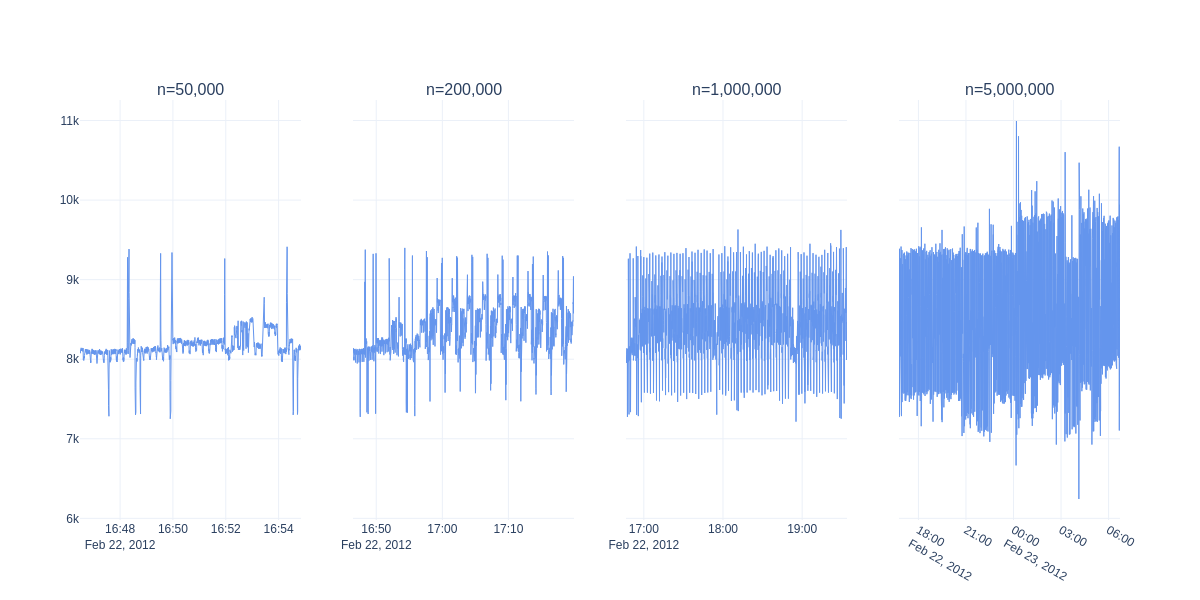

In [33]:
ns = [50_000, 200_000, 1_000_000, 5_000_000]
fig = FigureResampler(
    make_subplots(
        rows=1,
        cols=len(ns),
        shared_yaxes=True,
        subplot_titles=[f"n={n:,}" for n in ns],
    ),
    default_n_shown_samples=3500,
    default_downsampler=EfficientLTTB(interleave_gaps=True),
)

for col_idx, n in enumerate(ns, 1):
    fig.add_trace(
        {"line_color": "cornflowerblue", "line_width": 1, "showlegend": False},
        hf_x=electrical_power_series.iloc[:n].index,
        hf_y=electrical_power_series.values[:n],
        row=1,
        col=col_idx,
    )
fig.update_layout(template="plotly_white").show(renderer="png", width=1200, height=600)


## [DEBS 2013](https://debs.org/grand-challenges/2013/)

* `sid` is a sensor id which produced the position event
* `ts` is a timestamp in picoseconds, e.g.: 10753295594424116 (with the value of 10753295594424116 designating the start and 14879639146403495 the end of the game); 
* `x`, `y`, `z` describe the position of the sensor in mm (the origin is the middle of a full size football field) ; 
* |`v`| (in μm/s), 
* `vx`, `vy`, `vz` describe direction by a vector with size of 10,000

In [25]:
# Taks ~ 1 min 30sec
names_dtype = [
    ("sid", "category"),
    ("ts", "uint64"),
    ("x", "int32"),
    ("y", "int32"),
    ("z", "int32"),
    ("v", "int32"),
    ("a", "int32"),
    ("vx", "int32"),
    ("vy", "int32"),
    ("vz", "int32"),
    ("ax", "int32"),
    ("ay", "int32"),
    ("az", "int32"),
]

df_debs_2013 = pd.read_csv(
    dataset_dir / "full-game",
    sep=",",
    names=[name for name, _ in names_dtype],
    dtype={name: dtype for name, dtype in names_dtype},
    header=None,
    index_col=False,
)

df_debs_2013.to_parquet(dataset_dir / "debs_2013.parquet", engine="pyarrow")


In [34]:
# NOTE: we use ball speed ID 4 instead of 8 (as in the M4 paper) because
# ID 4 shows a larger dynamic range under the 1M data points limit than ID 8.
ball_speed_series = (
    df_debs_2013[df_debs_2013["sid"] == "4"].set_index("ts").sort_index()["v"]
)
ball_speed_series.index -= ball_speed_series.index[0]
ball_speed_series.reset_index(drop=False).to_parquet(
    dataset_dir / "ball_speed.parquet", engine="fastparquet"
)


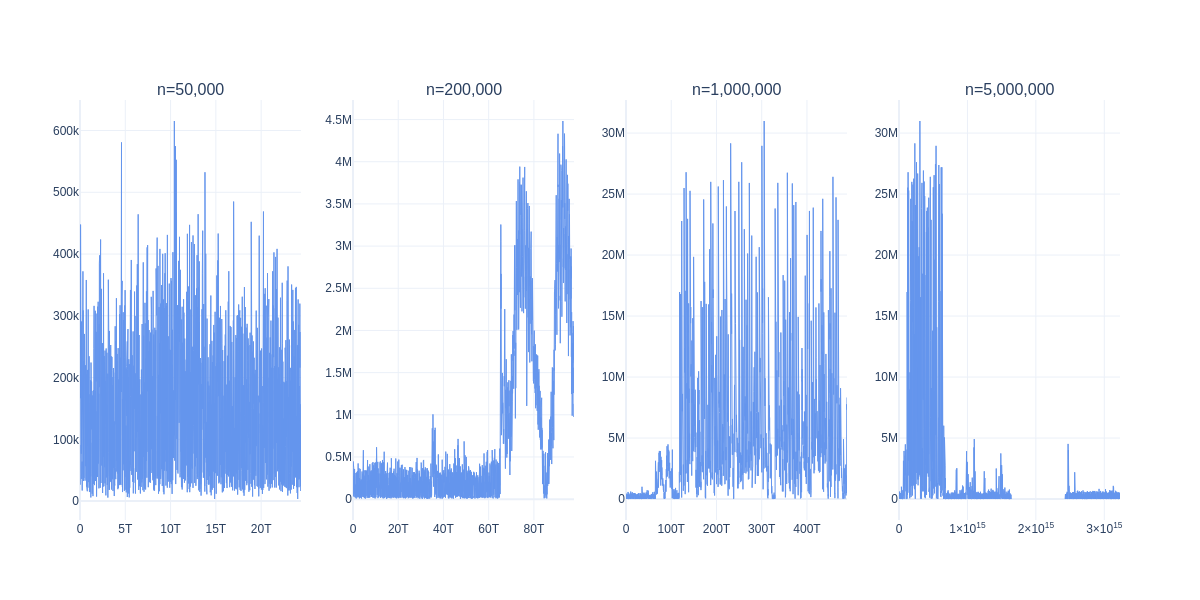

In [35]:
ns = [50_000, 200_000, 1_000_000, 5_000_000]
fig = FigureResampler(
    make_subplots(
        rows=1,
        cols=len(ns),
        shared_yaxes=False,
        # we set sharey to false as the dynamic range of the ball speed is
        # much larger than the electrical power
        subplot_titles=[f"n={n:,}" for n in ns],
    ),
    default_n_shown_samples=3500,
    default_downsampler=EfficientLTTB(interleave_gaps=True),
)

for col_idx, n in enumerate(ns, 1):
    fig.add_trace(
        {"line_color": "cornflowerblue", "line_width": 1, "showlegend": False},
        hf_x=ball_speed_series.iloc[:n].index,
        hf_y=ball_speed_series.values[:n],
        row=1,
        col=col_idx,
    )
fig.update_layout(template="plotly_white").show(renderer="png", width=1200, height=600)


## UCR `cinecg`

In [29]:
df_cinecg = pd.read_csv(
    ucr_archive_dir / "CinCECGTorso" / "CinCECGTorso_TEST.tsv", header=None, sep="\t"
)
df_cinecg = pd.Series(df_cinecg.values.ravel(), name="ECG").to_frame()
df_cinecg.to_parquet(dataset_dir / "cinecg.parquet")


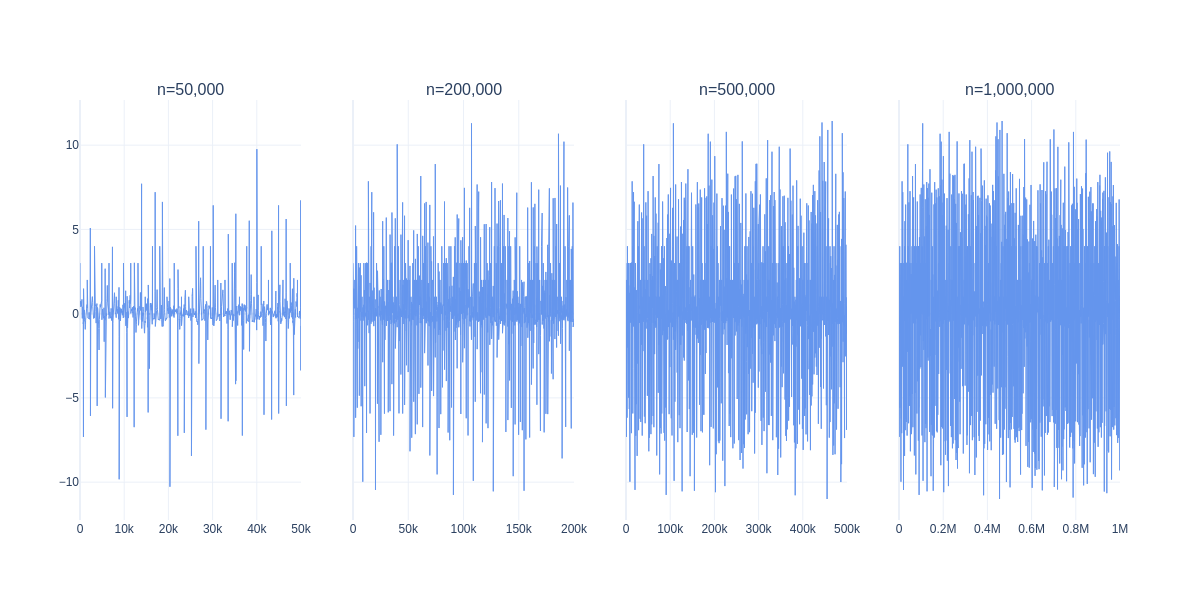

In [31]:
ns = [50_000, 200_000, 500_000, 1_000_000]
fig = FigureResampler(
    make_subplots(
        rows=1,
        cols=len(ns),
        shared_yaxes=True,
        subplot_titles=[f"n={n:,}" for n in ns],
    ),
    default_n_shown_samples=3500,
    default_downsampler=EfficientLTTB(interleave_gaps=True),
)

for col_idx, n in enumerate(ns, 1):
    fig.add_trace(
        {"line_color": "cornflowerblue", "line_width": 1, "showlegend": False},
        hf_x=df_cinecg.iloc[:n].index,
        hf_y=df_cinecg.iloc[:n].values.ravel(),
        row=1,
        col=col_idx,
    )
fig.update_layout(template="plotly_white").show(renderer="png", width=1200, height=600)


## [Kaggle](https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd) bitcoin data 

In [5]:
btc_series = pd.concat(
    [
        pd.read_csv(f).set_index("date")
        for f in list((dataset_dir / "btc").glob("*min.csv"))
    ]
).sort_index()
btc_series.index = pd.to_datetime(btc_series.index)
display(btc_series)


,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2017-01-01 00:01:00,1483228860,BTC/USD,966.34,966.34,966.34,966.34,7.610000,7353.847400
2017-01-01 00:02:00,1483228920,BTC/USD,966.16,966.37,966.16,966.37,8.087376,7815.397864
2017-01-01 00:03:00,1483228980,BTC/USD,966.37,966.37,966.37,966.37,0.000000,0.000000
2017-01-01 00:04:00,1483229040,BTC/USD,966.37,966.37,966.37,966.37,0.000000,0.000000
2017-01-01 00:05:00,1483229100,BTC/USD,966.43,966.43,966.43,966.43,0.107000,103.408010
...,...,...,...,...,...,...,...,...
2022-03-01 03:38:00,1646105880,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
2022-03-01 03:39:00,1646105940,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
2022-03-01 03:40:00,1646106000,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957


In [45]:
btc_series.to_parquet(dataset_dir / "btc.parquet", engine="fastparquet")
btc_series["high"].reset_index(drop=False).to_parquet(dataset_dir / "btc_high.parquet", engine="fastparquet")


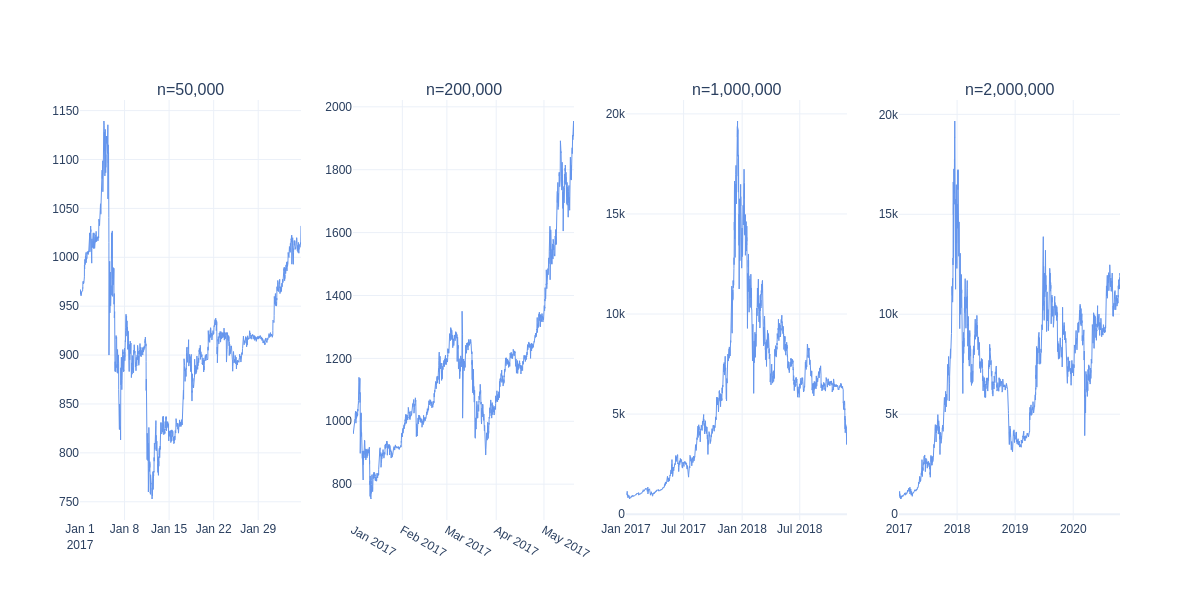

In [37]:
ns = [50_000, 200_000, 1_000_000, 2_000_000]
fig = FigureResampler(
    make_subplots(
        rows=1,
        cols=len(ns),
        shared_yaxes=False,
        # we set sharey to false as the dynamic range of the ball speed is
        # much larger than the electrical power
        subplot_titles=[f"n={n:,}" for n in ns],
    ),
    default_n_shown_samples=3500,
    default_downsampler=EfficientLTTB(interleave_gaps=True),
)

for col_idx, n in enumerate(ns, 1):
    fig.add_trace(
        {"line_color": "cornflowerblue", "line_width": 1, "showlegend": False},
        hf_x=btc_series.iloc[:n].index,
        hf_y=btc_series.iloc[:n]["high"],
        row=1,
        col=col_idx,
    )
fig.update_layout(template="plotly_white").show(renderer="png", width=1200, height=600)


## Noise & Sine

In [38]:
n = 1_000_000
x = np.arange(n)
y = (2 + np.sin(x / (n / (15 * 20))) + (np.random.randn(n) / 5)) * x / (n / 20)
hf_sine_series = pd.Series(data=y, index=x, name="sine")
hf_noise_series = pd.Series(data=np.random.randn(n), index=x, name="noise")  # ** 7

# fmt: off
hf_sine_series.to_frame().to_parquet( dataset_dir / "hf_sine.parquet", engine="fastparquet")
hf_noise_series.to_frame().to_parquet(dataset_dir / "hf_noise.parquet", engine="fastparquet")


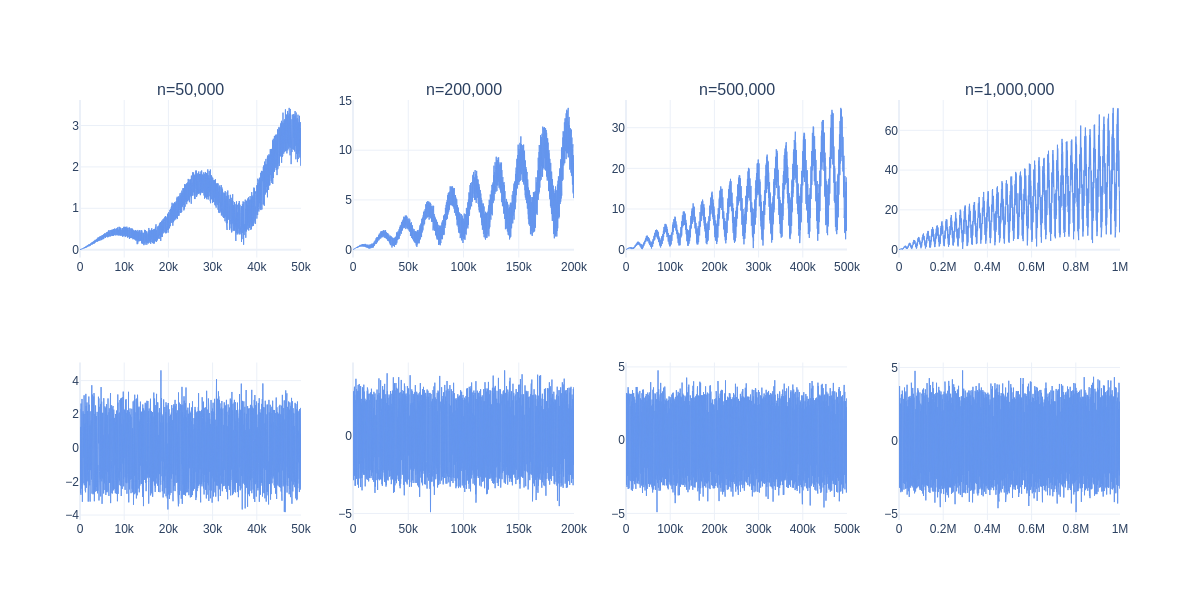

In [41]:
ns = [50_000, 200_000, 500_000, 1_000_000]
fig = FigureResampler(
    make_subplots(
        rows=2,
        cols=len(ns),
        shared_yaxes=False,
        # we set sharey to false as the dynamic range of the ball speed is
        # much larger than the electrical power
        subplot_titles=[f"n={n:,}" for n in ns],
    ),
    default_n_shown_samples=3500,
    default_downsampler=EfficientLTTB(interleave_gaps=True),
)

for col_idx, n in enumerate(ns, 1):
    fig.add_trace(
        {"line_color": "cornflowerblue", "line_width": 1, "showlegend": False},
        hf_x=hf_sine_series.iloc[:n].index,
        hf_y=hf_sine_series.iloc[:n],
        row=1,
        col=col_idx,
    )
    fig.add_trace(
        {"line_color": "cornflowerblue", "line_width": 1, "showlegend": False},
        hf_x=hf_noise_series.iloc[:n].index,
        hf_y=hf_noise_series.iloc[:n],
        row=2,
        col=col_idx,
    )
fig.update_layout(template="plotly_white").show(renderer="png", width=1200, height=600)
